In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: O
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


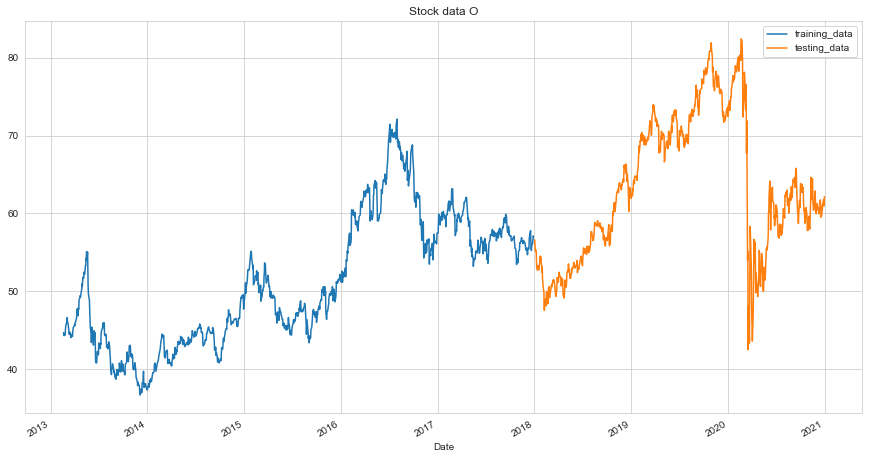

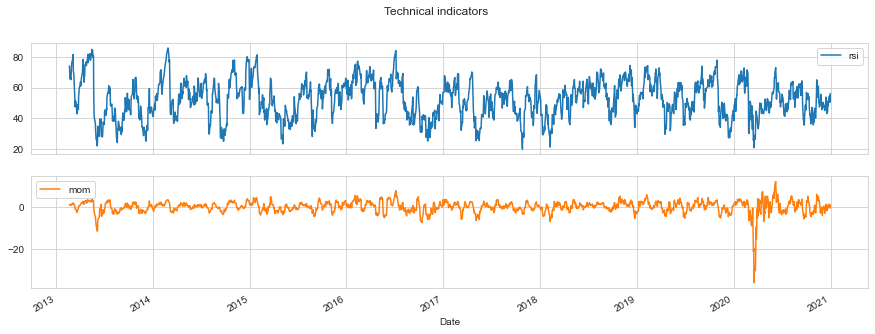

In [2]:
stock_name = 'o'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1159.90, duration: 0:00:00.299067
episode: 2/2000, episode end value: 1186.54, duration: 0:00:00.316069
episode: 3/2000, episode end value: 1246.05, duration: 0:00:00.322073
episode: 4/2000, episode end value: 1180.24, duration: 0:00:00.298069
episode: 5/2000, episode end value: 1210.08, duration: 0:00:00.323786
episode: 6/2000, episode end value: 1141.56, duration: 0:00:00.270229
episode: 7/2000, episode end value: 1118.76, duration: 0:00:00.288866
episode: 8/2000, episode end value: 1192.12, duration: 0:00:00.245055
episode: 9/2000, episode end value: 1202.92, duration: 0:00:00.256573
episode: 10/2000, episode end value: 1123.05, duration: 0:00:00.252420
episode: 11/2000, episode end value: 1203.30, duration: 0:00:00.269601
episode: 12/2000, episode end value: 1200.00, duration: 0:00:00.276188
episode: 13/2000, episode end value: 1173.46, duration: 0:00:00.258694
episode: 14/2000, episode end value: 1168.53, duration: 0:00:00.273281
episode: 15/200

episode: 117/2000, episode end value: 1195.04, duration: 0:00:00.244660
episode: 118/2000, episode end value: 1159.13, duration: 0:00:00.258455
episode: 119/2000, episode end value: 1161.78, duration: 0:00:00.274436
episode: 120/2000, episode end value: 1195.37, duration: 0:00:00.214192
episode: 121/2000, episode end value: 1161.24, duration: 0:00:00.221005
episode: 122/2000, episode end value: 1140.67, duration: 0:00:00.315368
episode: 123/2000, episode end value: 1199.37, duration: 0:00:00.216570
episode: 124/2000, episode end value: 1160.40, duration: 0:00:00.271586
episode: 125/2000, episode end value: 1179.04, duration: 0:00:00.243819
episode: 126/2000, episode end value: 1185.41, duration: 0:00:00.243185
episode: 127/2000, episode end value: 1189.30, duration: 0:00:00.233873
episode: 128/2000, episode end value: 1157.01, duration: 0:00:00.263726
episode: 129/2000, episode end value: 1187.33, duration: 0:00:00.252876
episode: 130/2000, episode end value: 1148.01, duration: 0:00:00

episode: 231/2000, episode end value: 1177.96, duration: 0:00:00.281807
episode: 232/2000, episode end value: 1191.95, duration: 0:00:00.312125
episode: 233/2000, episode end value: 1179.10, duration: 0:00:00.306383
episode: 234/2000, episode end value: 1185.03, duration: 0:00:00.255616
episode: 235/2000, episode end value: 1170.05, duration: 0:00:00.328477
episode: 236/2000, episode end value: 1178.65, duration: 0:00:00.373503
episode: 237/2000, episode end value: 1177.55, duration: 0:00:00.426643
episode: 238/2000, episode end value: 1175.26, duration: 0:00:00.401809
episode: 239/2000, episode end value: 1186.36, duration: 0:00:00.333221
episode: 240/2000, episode end value: 1185.57, duration: 0:00:00.332127
episode: 241/2000, episode end value: 1176.92, duration: 0:00:00.365373
episode: 242/2000, episode end value: 1181.00, duration: 0:00:00.367143
episode: 243/2000, episode end value: 1174.33, duration: 0:00:00.416762
episode: 244/2000, episode end value: 1178.99, duration: 0:00:00

episode: 345/2000, episode end value: 1185.02, duration: 0:00:00.423574
episode: 346/2000, episode end value: 1174.17, duration: 0:00:00.345280
episode: 347/2000, episode end value: 1175.22, duration: 0:00:00.461447
episode: 348/2000, episode end value: 1181.13, duration: 0:00:00.374928
episode: 349/2000, episode end value: 1184.03, duration: 0:00:00.312378
episode: 350/2000, episode end value: 1175.53, duration: 0:00:00.413032
episode: 351/2000, episode end value: 1177.08, duration: 0:00:00.407245
episode: 352/2000, episode end value: 1176.06, duration: 0:00:00.417907
episode: 353/2000, episode end value: 1165.26, duration: 0:00:00.479260
episode: 354/2000, episode end value: 1172.98, duration: 0:00:00.405181
episode: 355/2000, episode end value: 1177.07, duration: 0:00:00.484111
episode: 356/2000, episode end value: 1188.67, duration: 0:00:00.392655
episode: 357/2000, episode end value: 1173.09, duration: 0:00:00.375508
episode: 358/2000, episode end value: 1183.36, duration: 0:00:00

episode: 459/2000, episode end value: 1169.89, duration: 0:00:00.372465
episode: 460/2000, episode end value: 1173.48, duration: 0:00:00.418834
episode: 461/2000, episode end value: 1164.80, duration: 0:00:00.328316
episode: 462/2000, episode end value: 1171.55, duration: 0:00:00.416200
episode: 463/2000, episode end value: 1159.23, duration: 0:00:00.383940
episode: 464/2000, episode end value: 1178.61, duration: 0:00:00.403132
episode: 465/2000, episode end value: 1173.08, duration: 0:00:00.318410
episode: 466/2000, episode end value: 1173.13, duration: 0:00:00.382592
episode: 467/2000, episode end value: 1163.88, duration: 0:00:00.373643
episode: 468/2000, episode end value: 1158.19, duration: 0:00:00.400095
episode: 469/2000, episode end value: 1150.56, duration: 0:00:00.428470
episode: 470/2000, episode end value: 1141.70, duration: 0:00:00.422421
episode: 471/2000, episode end value: 1197.22, duration: 0:00:00.350180
episode: 472/2000, episode end value: 1203.40, duration: 0:00:00

episode: 573/2000, episode end value: 1180.78, duration: 0:00:00.341125
episode: 574/2000, episode end value: 1176.95, duration: 0:00:00.426754
episode: 575/2000, episode end value: 1172.89, duration: 0:00:00.367648
episode: 576/2000, episode end value: 1162.27, duration: 0:00:00.460254
episode: 577/2000, episode end value: 1169.98, duration: 0:00:00.320668
episode: 578/2000, episode end value: 1162.88, duration: 0:00:00.454377
episode: 579/2000, episode end value: 1184.45, duration: 0:00:00.333274
episode: 580/2000, episode end value: 1170.50, duration: 0:00:00.444054
episode: 581/2000, episode end value: 1191.41, duration: 0:00:00.405692
episode: 582/2000, episode end value: 1174.05, duration: 0:00:00.400914
episode: 583/2000, episode end value: 1171.77, duration: 0:00:00.391081
episode: 584/2000, episode end value: 1174.15, duration: 0:00:00.370193
episode: 585/2000, episode end value: 1170.02, duration: 0:00:00.383865
episode: 586/2000, episode end value: 1171.54, duration: 0:00:00

episode: 687/2000, episode end value: 1172.44, duration: 0:00:00.409991
episode: 688/2000, episode end value: 1178.97, duration: 0:00:00.409920
episode: 689/2000, episode end value: 1172.64, duration: 0:00:00.439208
episode: 690/2000, episode end value: 1175.09, duration: 0:00:00.388402
episode: 691/2000, episode end value: 1169.28, duration: 0:00:00.339077
episode: 692/2000, episode end value: 1177.03, duration: 0:00:00.338028
episode: 693/2000, episode end value: 1179.58, duration: 0:00:00.356757
episode: 694/2000, episode end value: 1186.41, duration: 0:00:00.340756
episode: 695/2000, episode end value: 1183.43, duration: 0:00:00.358138
episode: 696/2000, episode end value: 1174.43, duration: 0:00:00.346192
episode: 697/2000, episode end value: 1178.74, duration: 0:00:00.431975
episode: 698/2000, episode end value: 1176.70, duration: 0:00:00.390120
episode: 699/2000, episode end value: 1189.93, duration: 0:00:00.303679
episode: 700/2000, episode end value: 1172.13, duration: 0:00:00

episode: 801/2000, episode end value: 1179.64, duration: 0:00:00.333252
episode: 802/2000, episode end value: 1182.41, duration: 0:00:00.425606
episode: 803/2000, episode end value: 1179.99, duration: 0:00:00.451589
episode: 804/2000, episode end value: 1177.16, duration: 0:00:00.400653
episode: 805/2000, episode end value: 1194.34, duration: 0:00:00.321368
episode: 806/2000, episode end value: 1176.69, duration: 0:00:00.407822
episode: 807/2000, episode end value: 1176.31, duration: 0:00:00.421647
episode: 808/2000, episode end value: 1171.11, duration: 0:00:00.412721
episode: 809/2000, episode end value: 1169.46, duration: 0:00:00.428665
episode: 810/2000, episode end value: 1182.94, duration: 0:00:00.388635
episode: 811/2000, episode end value: 1169.51, duration: 0:00:00.420930
episode: 812/2000, episode end value: 1169.02, duration: 0:00:00.361559
episode: 813/2000, episode end value: 1178.02, duration: 0:00:00.369129
episode: 814/2000, episode end value: 1178.35, duration: 0:00:00

episode: 915/2000, episode end value: 1170.89, duration: 0:00:00.351031
episode: 916/2000, episode end value: 1166.21, duration: 0:00:00.330413
episode: 917/2000, episode end value: 1163.34, duration: 0:00:00.430502
episode: 918/2000, episode end value: 1154.66, duration: 0:00:00.451767
episode: 919/2000, episode end value: 1149.43, duration: 0:00:00.390692
episode: 920/2000, episode end value: 1154.88, duration: 0:00:00.395850
episode: 921/2000, episode end value: 1153.02, duration: 0:00:00.414030
episode: 922/2000, episode end value: 1158.73, duration: 0:00:00.398813
episode: 923/2000, episode end value: 1178.32, duration: 0:00:00.358946
episode: 924/2000, episode end value: 1172.43, duration: 0:00:00.355200
episode: 925/2000, episode end value: 1177.41, duration: 0:00:00.344077
episode: 926/2000, episode end value: 1187.08, duration: 0:00:00.329069
episode: 927/2000, episode end value: 1174.81, duration: 0:00:00.410058
episode: 928/2000, episode end value: 1171.50, duration: 0:00:00

episode: 1029/2000, episode end value: 1153.58, duration: 0:00:00.404307
episode: 1030/2000, episode end value: 1142.44, duration: 0:00:00.456869
episode: 1031/2000, episode end value: 1141.04, duration: 0:00:00.410812
episode: 1032/2000, episode end value: 1156.46, duration: 0:00:00.363367
episode: 1033/2000, episode end value: 1170.90, duration: 0:00:00.387045
episode: 1034/2000, episode end value: 1187.25, duration: 0:00:00.358318
episode: 1035/2000, episode end value: 1178.98, duration: 0:00:00.457914
episode: 1036/2000, episode end value: 1170.81, duration: 0:00:00.433563
episode: 1037/2000, episode end value: 1174.92, duration: 0:00:00.352514
episode: 1038/2000, episode end value: 1168.52, duration: 0:00:00.397594
episode: 1039/2000, episode end value: 1172.57, duration: 0:00:00.409725
episode: 1040/2000, episode end value: 1168.51, duration: 0:00:00.398591
episode: 1041/2000, episode end value: 1175.06, duration: 0:00:00.439737
episode: 1042/2000, episode end value: 1175.57, dur

episode: 1142/2000, episode end value: 1170.88, duration: 0:00:00.466309
episode: 1143/2000, episode end value: 1173.22, duration: 0:00:00.433700
episode: 1144/2000, episode end value: 1166.40, duration: 0:00:00.463827
episode: 1145/2000, episode end value: 1179.10, duration: 0:00:00.401643
episode: 1146/2000, episode end value: 1176.17, duration: 0:00:00.417664
episode: 1147/2000, episode end value: 1175.60, duration: 0:00:00.380965
episode: 1148/2000, episode end value: 1179.08, duration: 0:00:00.421009
episode: 1149/2000, episode end value: 1171.04, duration: 0:00:00.426891
episode: 1150/2000, episode end value: 1174.50, duration: 0:00:00.336184
episode: 1151/2000, episode end value: 1170.30, duration: 0:00:00.465814
episode: 1152/2000, episode end value: 1174.17, duration: 0:00:00.400094
episode: 1153/2000, episode end value: 1172.92, duration: 0:00:00.497323
episode: 1154/2000, episode end value: 1172.14, duration: 0:00:00.453746
episode: 1155/2000, episode end value: 1176.60, dur

episode: 1255/2000, episode end value: 1184.34, duration: 0:00:00.329864
episode: 1256/2000, episode end value: 1182.40, duration: 0:00:00.415597
episode: 1257/2000, episode end value: 1199.08, duration: 0:00:00.353115
episode: 1258/2000, episode end value: 1178.93, duration: 0:00:00.513779
episode: 1259/2000, episode end value: 1178.00, duration: 0:00:00.314628
episode: 1260/2000, episode end value: 1179.34, duration: 0:00:00.434253
episode: 1261/2000, episode end value: 1176.25, duration: 0:00:00.400514
episode: 1262/2000, episode end value: 1173.09, duration: 0:00:00.413264
episode: 1263/2000, episode end value: 1184.37, duration: 0:00:00.408074
episode: 1264/2000, episode end value: 1174.19, duration: 0:00:00.370010
episode: 1265/2000, episode end value: 1181.99, duration: 0:00:00.426161
episode: 1266/2000, episode end value: 1179.52, duration: 0:00:00.437155
episode: 1267/2000, episode end value: 1187.05, duration: 0:00:00.354382
episode: 1268/2000, episode end value: 1178.67, dur

episode: 1368/2000, episode end value: 1164.99, duration: 0:00:00.397041
episode: 1369/2000, episode end value: 1172.57, duration: 0:00:00.390422
episode: 1370/2000, episode end value: 1173.47, duration: 0:00:00.360174
episode: 1371/2000, episode end value: 1168.34, duration: 0:00:00.364396
episode: 1372/2000, episode end value: 1167.05, duration: 0:00:00.363610
episode: 1373/2000, episode end value: 1165.36, duration: 0:00:00.355109
episode: 1374/2000, episode end value: 1168.46, duration: 0:00:00.341002
episode: 1375/2000, episode end value: 1168.11, duration: 0:00:00.378892
episode: 1376/2000, episode end value: 1168.53, duration: 0:00:00.365229
episode: 1377/2000, episode end value: 1170.95, duration: 0:00:00.373124
episode: 1378/2000, episode end value: 1168.96, duration: 0:00:00.391912
episode: 1379/2000, episode end value: 1181.34, duration: 0:00:00.427938
episode: 1380/2000, episode end value: 1173.36, duration: 0:00:00.419776
episode: 1381/2000, episode end value: 1169.74, dur

episode: 1481/2000, episode end value: 1171.88, duration: 0:00:00.362859
episode: 1482/2000, episode end value: 1172.98, duration: 0:00:00.403477
episode: 1483/2000, episode end value: 1171.21, duration: 0:00:00.407856
episode: 1484/2000, episode end value: 1172.93, duration: 0:00:00.399311
episode: 1485/2000, episode end value: 1173.43, duration: 0:00:00.367511
episode: 1486/2000, episode end value: 1161.56, duration: 0:00:00.410806
episode: 1487/2000, episode end value: 1165.32, duration: 0:00:00.353302
episode: 1488/2000, episode end value: 1171.48, duration: 0:00:00.381376
episode: 1489/2000, episode end value: 1178.67, duration: 0:00:00.327191
episode: 1490/2000, episode end value: 1178.70, duration: 0:00:00.418068
episode: 1491/2000, episode end value: 1169.71, duration: 0:00:00.388221
episode: 1492/2000, episode end value: 1167.12, duration: 0:00:00.413688
episode: 1493/2000, episode end value: 1172.49, duration: 0:00:00.441707
episode: 1494/2000, episode end value: 1164.81, dur

episode: 1594/2000, episode end value: 1174.27, duration: 0:00:00.409395
episode: 1595/2000, episode end value: 1173.17, duration: 0:00:00.442439
episode: 1596/2000, episode end value: 1168.27, duration: 0:00:00.443179
episode: 1597/2000, episode end value: 1176.38, duration: 0:00:00.419088
episode: 1598/2000, episode end value: 1174.79, duration: 0:00:00.352055
episode: 1599/2000, episode end value: 1175.97, duration: 0:00:00.377271
episode: 1600/2000, episode end value: 1179.41, duration: 0:00:00.345089
episode: 1601/2000, episode end value: 1176.76, duration: 0:00:00.462874
episode: 1602/2000, episode end value: 1181.00, duration: 0:00:00.325204
episode: 1603/2000, episode end value: 1174.35, duration: 0:00:00.357020
episode: 1604/2000, episode end value: 1169.51, duration: 0:00:00.360176
episode: 1605/2000, episode end value: 1181.38, duration: 0:00:00.322847
episode: 1606/2000, episode end value: 1170.80, duration: 0:00:00.395121
episode: 1607/2000, episode end value: 1181.81, dur

episode: 1707/2000, episode end value: 1171.47, duration: 0:00:00.404517
episode: 1708/2000, episode end value: 1165.95, duration: 0:00:00.420247
episode: 1709/2000, episode end value: 1183.45, duration: 0:00:00.417822
episode: 1710/2000, episode end value: 1168.05, duration: 0:00:00.456090
episode: 1711/2000, episode end value: 1174.24, duration: 0:00:00.460910
episode: 1712/2000, episode end value: 1180.29, duration: 0:00:00.458136
episode: 1713/2000, episode end value: 1177.28, duration: 0:00:00.424390
episode: 1714/2000, episode end value: 1180.77, duration: 0:00:00.383871
episode: 1715/2000, episode end value: 1170.76, duration: 0:00:00.401538
episode: 1716/2000, episode end value: 1177.17, duration: 0:00:00.384649
episode: 1717/2000, episode end value: 1186.93, duration: 0:00:00.400167
episode: 1718/2000, episode end value: 1171.12, duration: 0:00:00.396972
episode: 1719/2000, episode end value: 1166.82, duration: 0:00:00.346607
episode: 1720/2000, episode end value: 1177.94, dur

episode: 1820/2000, episode end value: 1173.01, duration: 0:00:00.332750
episode: 1821/2000, episode end value: 1179.06, duration: 0:00:00.441661
episode: 1822/2000, episode end value: 1169.68, duration: 0:00:00.451165
episode: 1823/2000, episode end value: 1174.27, duration: 0:00:00.349347
episode: 1824/2000, episode end value: 1177.25, duration: 0:00:00.362892
episode: 1825/2000, episode end value: 1171.93, duration: 0:00:00.344238
episode: 1826/2000, episode end value: 1170.67, duration: 0:00:00.348415
episode: 1827/2000, episode end value: 1171.81, duration: 0:00:00.416393
episode: 1828/2000, episode end value: 1171.02, duration: 0:00:00.343334
episode: 1829/2000, episode end value: 1166.70, duration: 0:00:00.319237
episode: 1830/2000, episode end value: 1171.25, duration: 0:00:00.330308
episode: 1831/2000, episode end value: 1171.35, duration: 0:00:00.398354
episode: 1832/2000, episode end value: 1176.02, duration: 0:00:00.354563
episode: 1833/2000, episode end value: 1176.65, dur

episode: 1933/2000, episode end value: 1173.93, duration: 0:00:00.368087
episode: 1934/2000, episode end value: 1186.63, duration: 0:00:00.285661
episode: 1935/2000, episode end value: 1180.59, duration: 0:00:00.294475
episode: 1936/2000, episode end value: 1174.25, duration: 0:00:00.310535
episode: 1937/2000, episode end value: 1185.48, duration: 0:00:00.331978
episode: 1938/2000, episode end value: 1170.38, duration: 0:00:00.309658
episode: 1939/2000, episode end value: 1174.10, duration: 0:00:00.322632
episode: 1940/2000, episode end value: 1195.32, duration: 0:00:00.276793
episode: 1941/2000, episode end value: 1177.90, duration: 0:00:00.277545
episode: 1942/2000, episode end value: 1170.66, duration: 0:00:00.354163
episode: 1943/2000, episode end value: 1170.23, duration: 0:00:00.325999
episode: 1944/2000, episode end value: 1172.44, duration: 0:00:00.330663
episode: 1945/2000, episode end value: 1166.49, duration: 0:00:00.297818
episode: 1946/2000, episode end value: 1173.05, dur

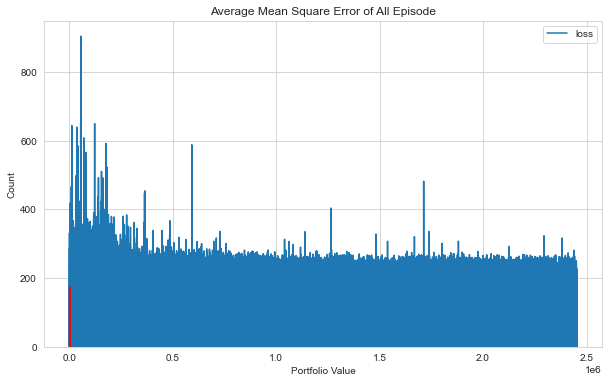

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

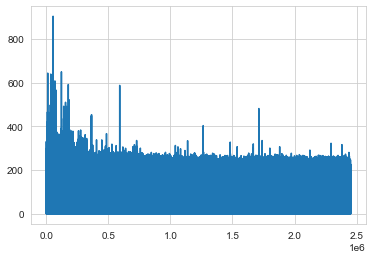

In [5]:
plt.plot(agent.model.losses)

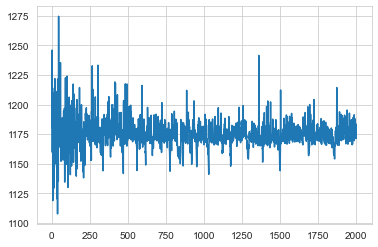

In [6]:
plt.plot(portfolio_value)

episode end value: 1241.63, duration: 0:00:00.106995
Sell: 362 times, Buy: 317 times


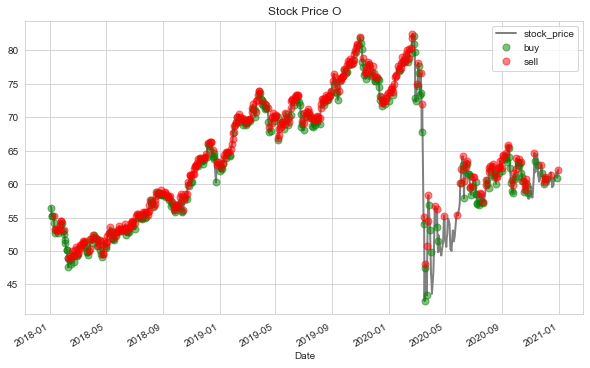

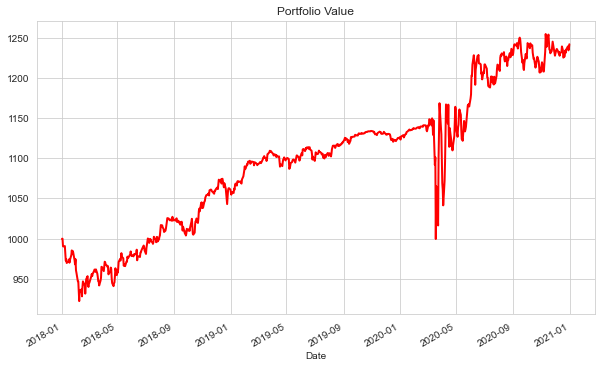

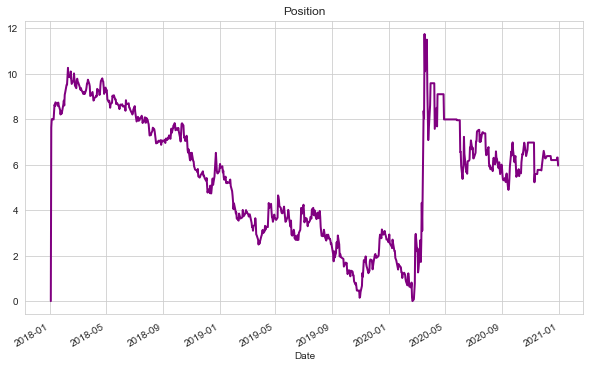

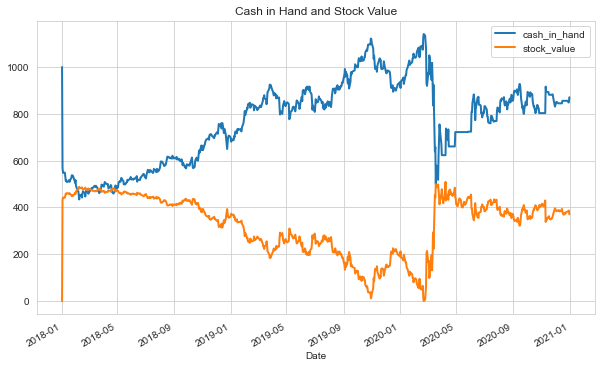

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: O
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.48 %
Volatility: 0.1318
shape ratio: 0.4840
Maximun drawdown: -13.04 %
Calmar ratio: 0.5736
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 3.17 %
Volatility (benchmark): 0.3679
shape ratio: 0.0562
Maximun drawdown: -48.45 %
Calmar ratio (benchmark): 0.0654


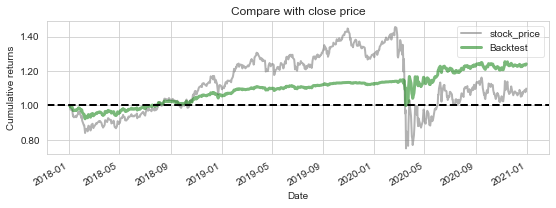

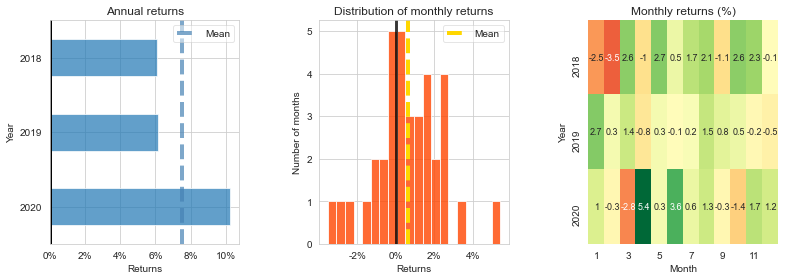

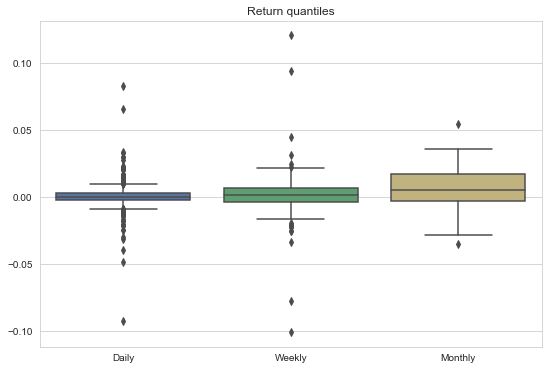

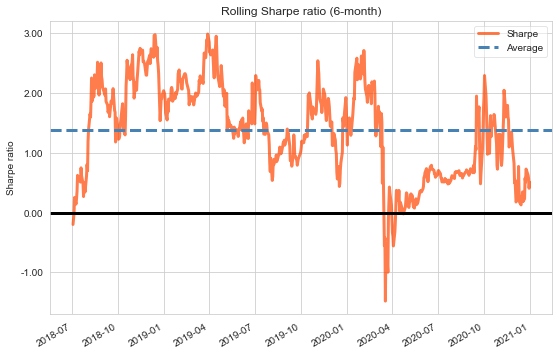

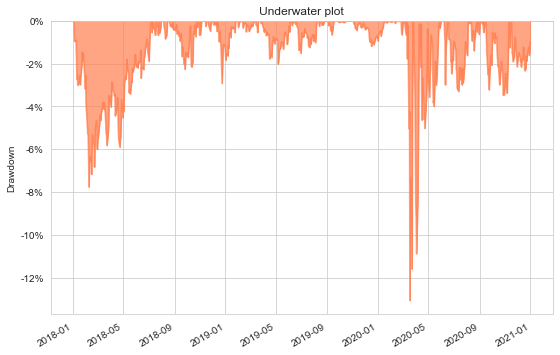

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')